In [179]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
data_path = '../dataset/'
train_file = 'train.csv'
test_file =  'test.csv'

# データの取り込み(.read_csv)

In [181]:
pdf_train = pd.read_csv(os.path.join(data_path,train_file))
pdf_test = pd.read_csv(os.path.join(data_path,test_file))

# 表の一部分表示(pandasの.head())

In [182]:
pdf_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [183]:
pdf_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# データの大きさの確認(pandasの.shape)

In [184]:
print('#train data: {0}, #test data: {1}'.format(pdf_train.shape, pdf_test.shape))

#train data: (1460, 81), #test data: (1459, 80)


# ヒストグラムによる分布の可視化(.hist)

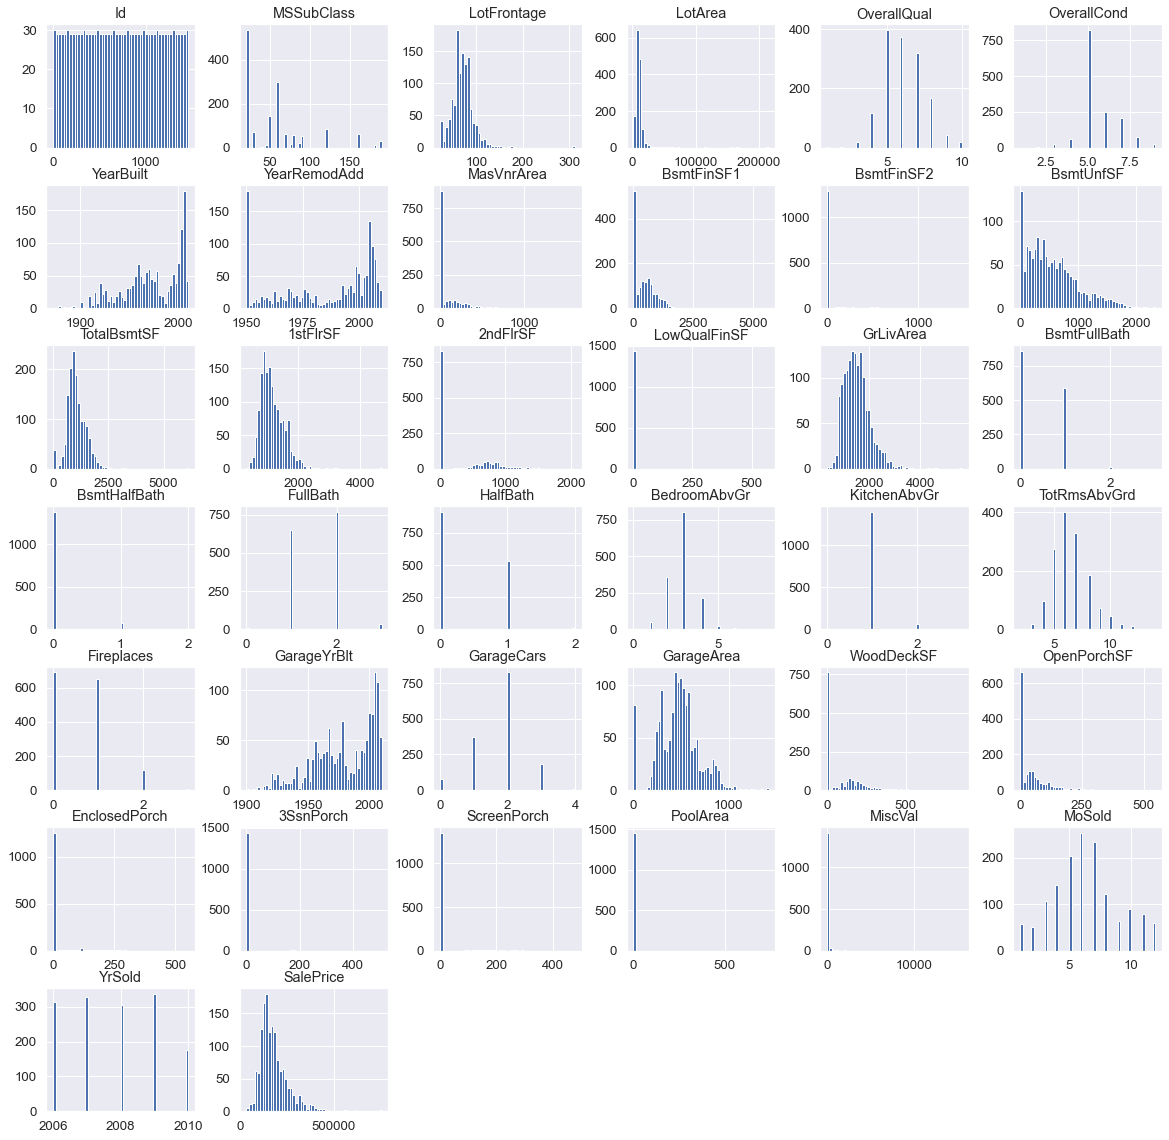

In [185]:
pdf_train.hist(bins=50, figsize=(20,20))
# creates a figure with 10 (width) x 5 (height) inches
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

# 特徴量ごとの平均値、最大値、最小値などの統計量確認

In [186]:
pdf_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# 欠損値チェック

In [187]:
pdf_train.isnull().sum()[pdf_train.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

# 型チェック

In [188]:
na_columns = pdf_train.isnull().sum()[pdf_train.isnull().sum()>0].index.tolist()
pdf_train[na_columns].dtypes.sort_values()

LotFrontage     float64
MasVnrArea      float64
GarageYrBlt     float64
PoolQC           object
GarageCond       object
GarageQual       object
GarageFinish     object
GarageType       object
FireplaceQu      object
Electrical       object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Alley            object
Fence            object
MiscFeature      object
dtype: object

# ヒートマップによる相関の強い特徴量チェック(heatmap)

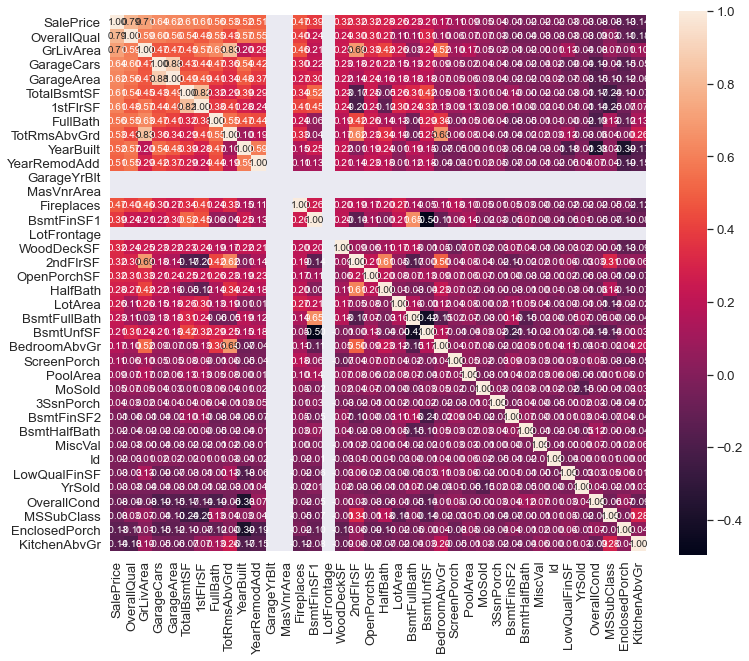

In [189]:
k = 50 # number of variables for heatmap
df = pdf_train
corrmat = df.corr()
cols = corrmat.nlargest(k, "SalePrice")["SalePrice"].index
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
fig.savefig("images/corr_heatmap.png")

In [190]:
pdf_train['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

# 外れ値の確認

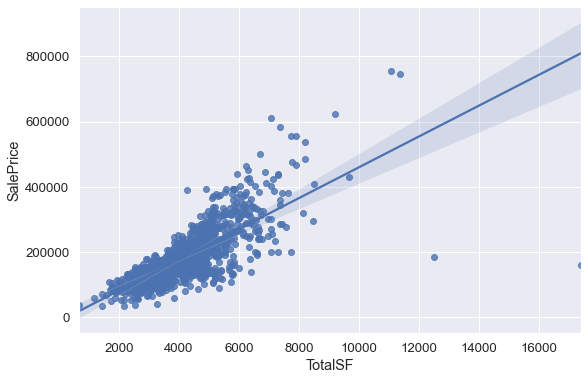

In [191]:
df = pdf_train
df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"] + df["GrLivArea"]
fig = plt.figure(figsize=(9,6))
sns.regplot(x=df["TotalSF"], y=df["SalePrice"])
plt.xlabel("TotalSF")
plt.ylabel("SalePrice")
plt.show()
fig.savefig("images/outlier_TotalSF_SalePrice.png")

# 特徴量作成 

## 選択する特徴量一覧

In [192]:
features_columns_name = ['OverallQual', 
                                                 'GrLivArea', 
                                                 'GarageCars', 
                                                 'GarageArea', 
                                                 'TotalBsmtSF', 
                                                 '1stFlrSF', 
                                                 'FullBath',
                                                 'TotRmsAbvGrd',
                                                 'YearBuilt',
                                                 'YearRemodAdd',
                                                 'SalePrice']
features_columns_name_test = ['OverallQual', 
                                                 'GrLivArea', 
                                                 'GarageCars', 
                                                 'GarageArea', 
                                                 'TotalBsmtSF', 
                                                 '1stFlrSF', 
                                                 'FullBath',
                                                 'TotRmsAbvGrd',
                                                 'YearBuilt',
                                                 'YearRemodAdd']

## 必要な特徴量選択

In [193]:
pdf_train_features = pdf_train[features_columns_name]
pdf_test_features = pdf_test[features_columns_name_test]

## 選択した特徴量のタイプ確認

In [194]:
pdf_train_features.dtypes

OverallQual     int64
GrLivArea       int64
GarageCars      int64
GarageArea      int64
TotalBsmtSF     int64
1stFlrSF        int64
FullBath        int64
TotRmsAbvGrd    int64
YearBuilt       int64
YearRemodAdd    int64
SalePrice       int64
dtype: object

## 選択した特徴量の変数確認(カテゴリカル変数なのか連続値なのか離散値なのか)

In [195]:
pdf_train_features.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000


* OverallQual:カテゴリカル変数
* GrLivArea:連続値
* GarageCars:離散値
* GarageArea:連続値
* TotalBsmtSF:連続値
* 1stFlrSF：連続値
* FullBath：離散値
* TotRmsAbvGrd：離散値
* YearBuilt：離散値
* YearRemodAdd：離散値
* SalePrice：連続値

## 特徴量作成

### 外れ値の削除

#### 単変量解析

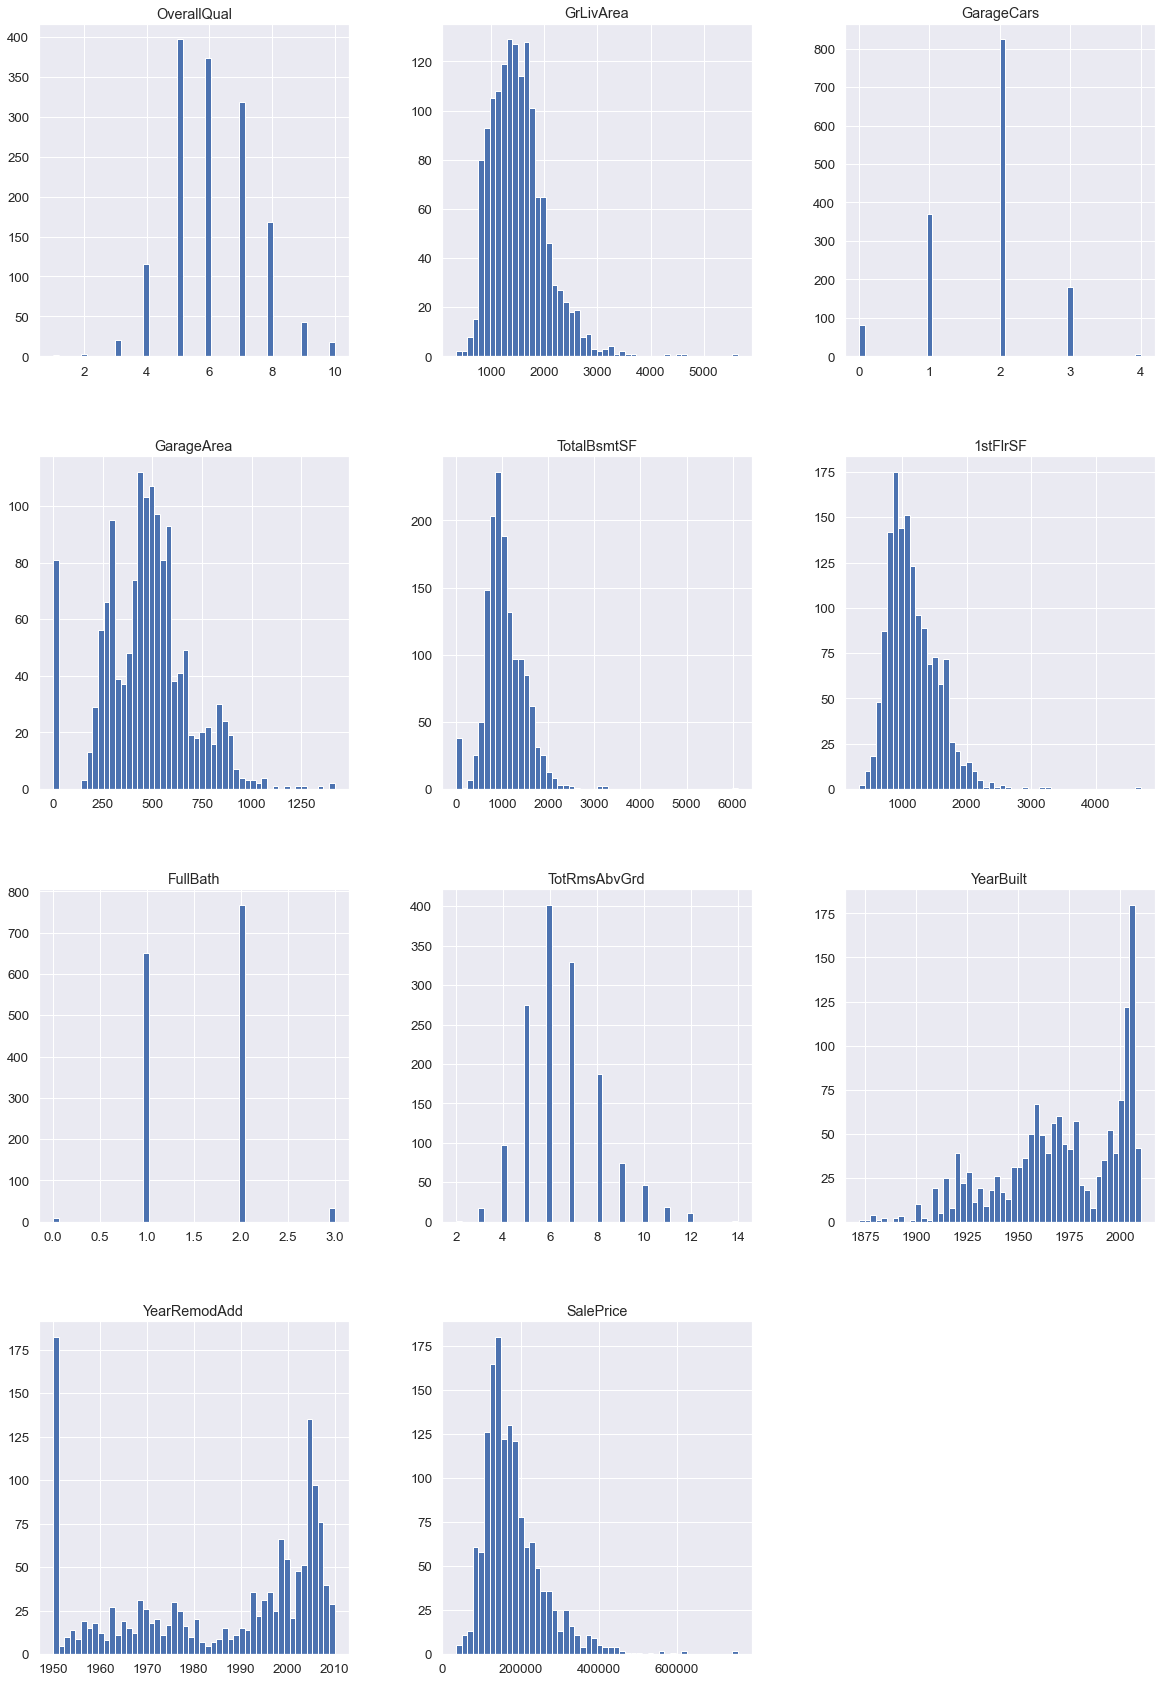

In [196]:
pdf_train_features.hist(bins=50, figsize=(20, 30))
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

* GrLivAreaは4000未満
* TotalBsmtSFは3000未満
* 1stFlrSFは3000未満
* SalePriceは正規分布化

#### 二変量解析

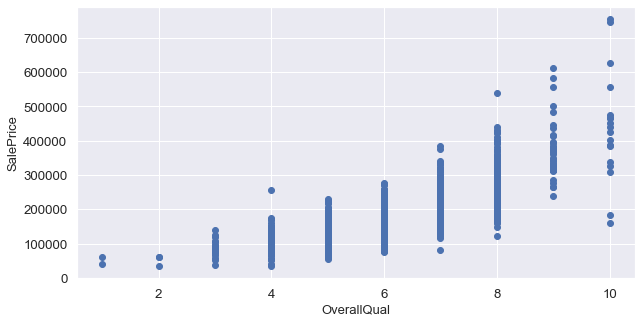

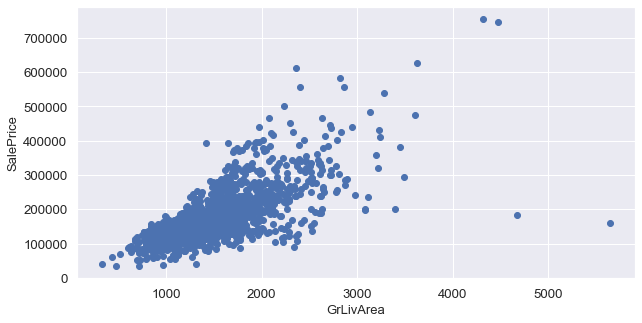

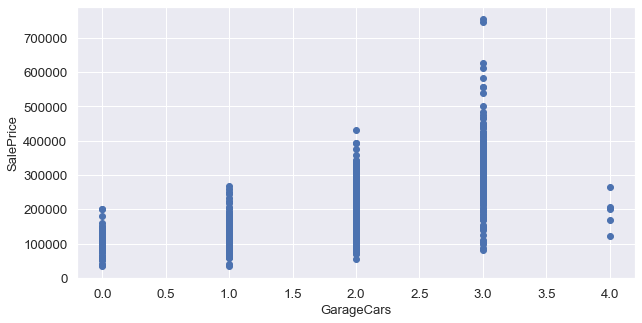

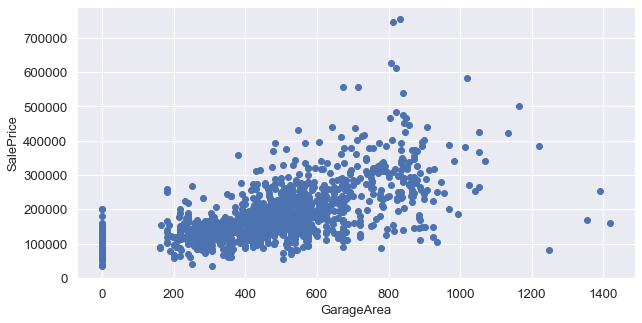

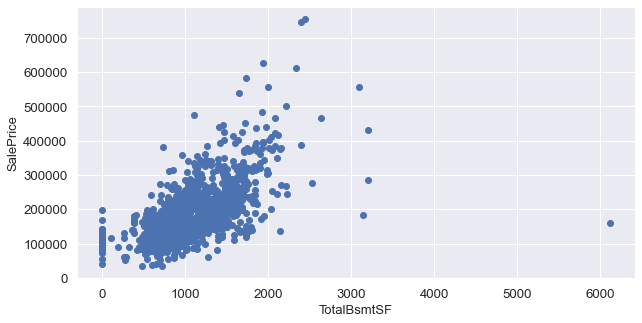

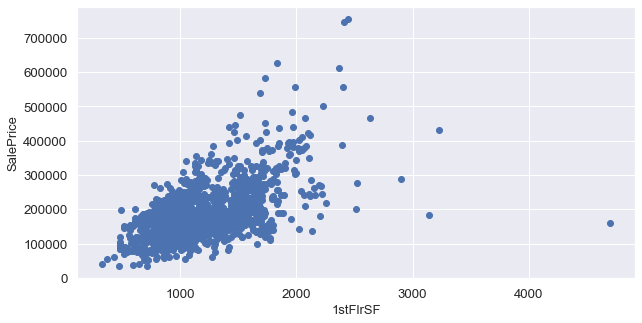

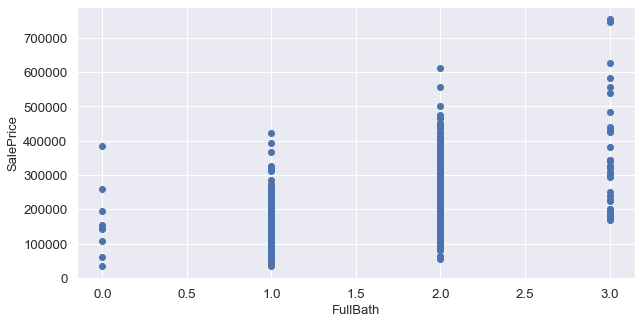

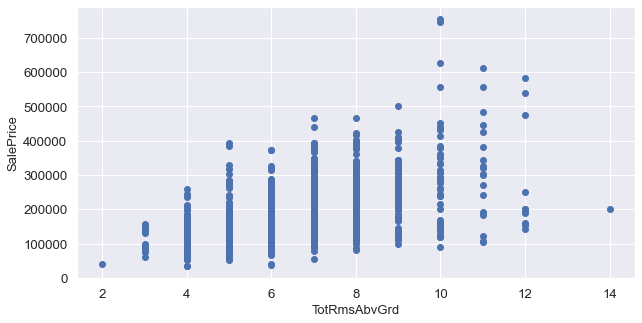

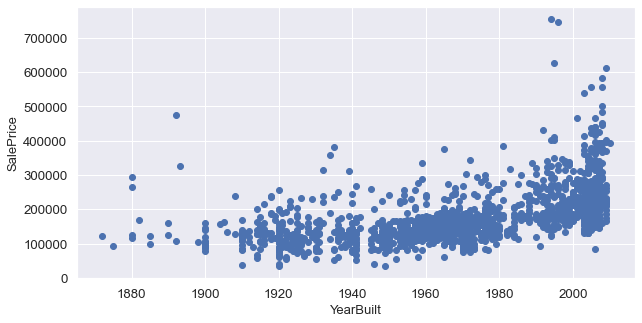

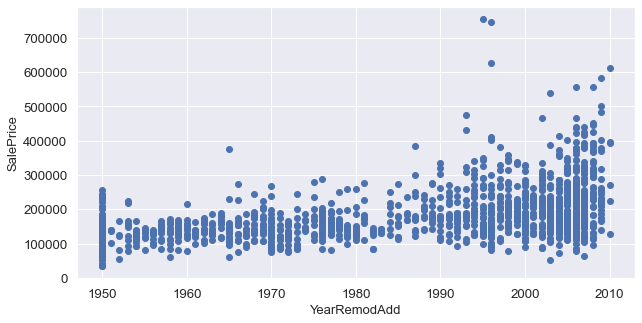

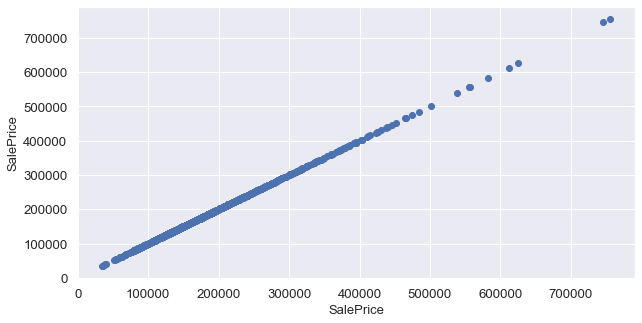

In [197]:
for columns in features_columns_name:
    fig, ax = plt.subplots()
    ax.scatter(x = pdf_train_features[columns], y = pdf_train_features['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel('{}'.format(columns), fontsize=13)
    plt.show()

* GrLivAreaは4000未満
* GarageAreaは1200未満
* TotalBsmtSFは3000未満
* 1stFlrSFは3000未満
* SalePriceは正規分布化

In [198]:
pdf_train_features = pdf_train_features[pdf_train_features['GrLivArea']<4000]
pdf_train_features = pdf_train_features[pdf_train_features['GarageArea']<1200]
pdf_train_features = pdf_train_features[pdf_train_features['TotalBsmtSF']<3000]
pdf_train_features = pdf_train_features[pdf_train_features['1stFlrSF']<3000]

### 予測値SalePriceの正規分布化

/Users/ozakiryosuke/.pyenv/versions/anaconda3-5.3.1/envs/Kaggle_py37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

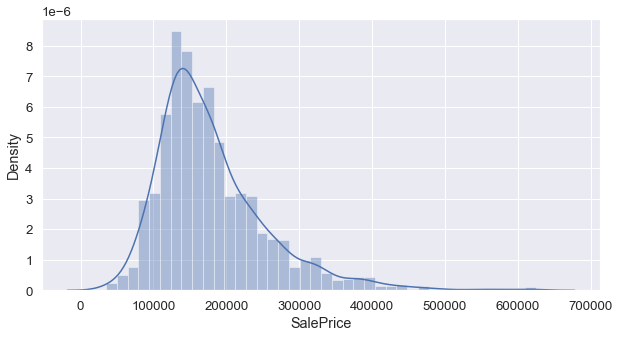

In [199]:
sns.distplot(pdf_train_features['SalePrice'])

正規分布化

/Users/ozakiryosuke/.pyenv/versions/anaconda3-5.3.1/envs/Kaggle_py37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice_log', ylabel='Density'>

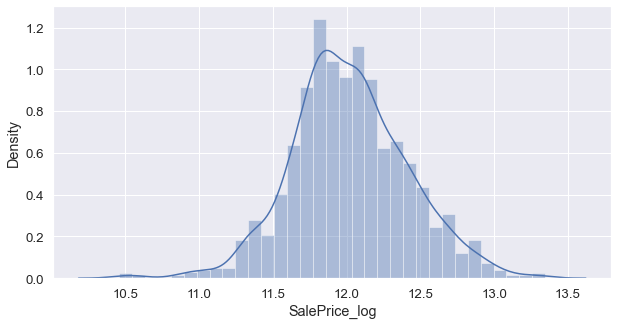

In [200]:
pdf_train_features['SalePrice_log'] = np.log(pdf_train_features['SalePrice'])
sns.distplot(pdf_train_features['SalePrice_log'])

### 欠損値の補完/削除

#### 欠損値数の確認

In [201]:
pdf_train_features.isnull().sum()[pdf_train_features.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

欠損値なし！！

In [202]:
pdf_test_features.isnull().sum()[pdf_test_features.isnull().sum()>0].sort_values(ascending=False)

TotalBsmtSF    1
GarageArea     1
GarageCars     1
dtype: int64

In [203]:
pdf_test_features = pdf_test_features.fillna(0)

### カテゴリカル変数をダミー変数化

In [204]:
OverallQual_list = {10: 'OQ_Very_Excellent', 9: 'OQ_Excellent', 8: 'OQ_Very_Good', 7: 'OQ_Good', 6: 'OQ_Above_Average', 5: 'OQ_Average', 4: 'OQ_Below_Average', 3: 'OQ_Fair', 2: 'OQ_Poor', 1: 'OQ_Very_Poor'}

In [205]:
pdf_train_features_trasform = pdf_train_features.drop('OverallQual', axis=1).join(pd.get_dummies(pdf_train_features['OverallQual']).rename(columns=OverallQual_list), how='left')

In [206]:
pdf_test_features_trasform = pdf_test_features.drop('OverallQual', axis=1).join(pd.get_dummies(pdf_test_features['OverallQual']).rename(columns=OverallQual_list), how='left')

In [207]:
pdf_train_features_trasform.head()

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice,...,OQ_Very_Poor,OQ_Poor,OQ_Fair,OQ_Below_Average,OQ_Average,OQ_Above_Average,OQ_Good,OQ_Very_Good,OQ_Excellent,OQ_Very_Excellent
0,1710,2,548,856,856,2,8,2003,2003,208500,...,0,0,0,0,0,0,1,0,0,0
1,1262,2,460,1262,1262,2,6,1976,1976,181500,...,0,0,0,0,0,1,0,0,0,0
2,1786,2,608,920,920,2,6,2001,2002,223500,...,0,0,0,0,0,0,1,0,0,0
3,1717,3,642,756,961,1,7,1915,1970,140000,...,0,0,0,0,0,0,1,0,0,0
4,2198,3,836,1145,1145,2,9,2000,2000,250000,...,0,0,0,0,0,0,0,1,0,0


### データ分割 / クロスバリデーション

In [208]:
data_X = pdf_train_features_trasform.drop(['SalePrice', 'SalePrice_log'], axis=1)
data_Y = pdf_train_features_trasform[['SalePrice_log']]

In [209]:
data_X.head()

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,OQ_Very_Poor,OQ_Poor,OQ_Fair,OQ_Below_Average,OQ_Average,OQ_Above_Average,OQ_Good,OQ_Very_Good,OQ_Excellent,OQ_Very_Excellent
0,1710,2,548,856,856,2,8,2003,2003,0,0,0,0,0,0,1,0,0,0
1,1262,2,460,1262,1262,2,6,1976,1976,0,0,0,0,0,1,0,0,0,0
2,1786,2,608,920,920,2,6,2001,2002,0,0,0,0,0,0,1,0,0,0
3,1717,3,642,756,961,1,7,1915,1970,0,0,0,0,0,0,1,0,0,0
4,2198,3,836,1145,1145,2,9,2000,2000,0,0,0,0,0,0,0,1,0,0


In [210]:
data_Y.head()

,SalePrice_log
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [211]:
print(data_X.shape)
print(data_Y.shape)

(1449, 19)
(1449, 1)


In [212]:
from sklearn.cross_validation import train_test_split
(X_train, X_dev, Y_train, Y_dev) = train_test_split(data_X, data_Y, test_size = 0.2, random_state = 777)
X_test = pdf_test_features_trasform.reindex(columns=X_train.columns)

In [213]:
print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(1159, 19)
(290, 19)
(1459, 19)


# モデリング

In [214]:
from sklearn.metrics import mean_squared_error

決定木、ランダムフォレスト、線形回帰、LightGBMを試す

## 決定木

In [215]:
from sklearn import tree

### Train

In [216]:
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(X_train, Y_train)
predicted_clf_train = clf.predict(X_train)

### devデータ予測

In [217]:
predicted_clf_dev = clf.predict(X_dev)

### 評価(RMSE)

In [218]:
print('MSE train : %.3f, dev : %.3f' % (mean_squared_error(Y_train, predicted_clf_train), mean_squared_error(Y_dev, predicted_clf_dev)) )

MSE train : 0.052, dev : 0.048


### Testデータ予測

In [228]:
predicted_clf_test = clf.predict(X_test)
predicted_clf_test_transform = np.exp(predicted_clf_test)
submit_clf_test = pdf_test[['Id']].join(pd.DataFrame(predicted_clf_test_transform, columns=(['SalePrice'])))
submit_clf_test.to_csv('output/submission.csv', index=False)

## ランダムフォレスト

In [119]:
from sklearn.ensemble import RandomForestRegressor

### Train

In [123]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
predicted_rf_train = rf.predict(X_train)

/Users/ozakiryosuke/.pyenv/versions/anaconda3-5.3.1/envs/Kaggle_py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### devデータ予測

In [167]:
predicted_rf_dev = rf.predict(X_dev)

### 評価(RMSE)

In [125]:
print('MSE train : %.3f, dev : %.3f' % (mean_squared_error(Y_train, predicted_rf_train), mean_squared_error(Y_dev, predicted_rf_dev)) )

MSE train : 0.006, dev : 0.023


In [165]:
predicted_rf_test = rf.predict(X_test)

In [170]:
X_test

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,OQ_Very_Poor,OQ_Poor,OQ_Fair,OQ_Below_Average,OQ_Average,OQ_Above_Average,OQ_Good,OQ_Very_Good,OQ_Excellent,OQ_Very_Excellent
0,896,1.0,730.0,882.0,896,1,5,1961,1961,0,0,0,0,1,0,0,0,0,0
1,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,0,0,0,0,0,1,0,0,0,0
2,1629,2.0,482.0,928.0,928,2,6,1997,1998,0,0,0,0,1,0,0,0,0,0
3,1604,2.0,470.0,926.0,926,2,7,1998,1998,0,0,0,0,0,1,0,0,0,0
4,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1092,0.0,0.0,546.0,546,1,5,1970,1970,0,0,0,1,0,0,0,0,0,0
1455,1092,1.0,286.0,546.0,546,1,6,1970,1970,0,0,0,1,0,0,0,0,0,0
1456,1224,2.0,576.0,1224.0,1224,1,7,1960,1996,0,0,0,0,1,0,0,0,0,0
1457,970,0.0,0.0,912.0,970,1,6,1992,1992,0,0,0,0,1,0,0,0,0,0


In [169]:
X_dev

,OQ_Poor,GrLivArea,FullBath,OQ_Very_Good,OQ_Fair,OQ_Very_Excellent,OQ_Below_Average,TotalBsmtSF,OQ_Very_Poor,OQ_Average,OQ_Excellent,YearRemodAdd,GarageCars,OQ_Good,YearBuilt,GarageArea,OQ_Above_Average,1stFlrSF,TotRmsAbvGrd
718,0,2418,2,0,0,0,0,1311,0,0,0,1994,3,1,1993,983,0,1325,9
56,0,1739,2,1,0,0,0,970,0,0,0,2000,2,0,1999,480,0,983,7
939,0,2403,2,0,0,0,0,1032,0,0,0,1950,1,1,1940,349,0,1207,10
348,0,1626,2,0,0,0,0,764,0,0,0,2004,2,1,2003,474,0,764,6
787,0,2084,2,0,0,0,0,956,0,0,0,2004,2,1,2004,618,0,956,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0,1150,1,0,0,0,0,1150,0,1,0,1959,1,0,1959,300,0,1150,6
940,0,1728,2,0,0,0,0,1728,0,0,0,1976,2,0,1976,574,1,1728,8
210,0,864,1,0,0,0,0,864,0,1,0,1950,0,0,1925,0,0,864,5
1041,0,1632,1,0,0,0,0,800,0,0,0,2000,2,0,1966,484,1,800,7


 ## 線形回帰

In [132]:
from sklearn.linear_model import LinearRegression

###  Train 

In [134]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
predicted_lr_train = lr.predict(X_train)

### devデータ予測

In [136]:
predicted_lr_dev = lr.predict(X_dev)

### 評価(RMSE)

In [137]:
print('MSE train : %.3f, dev : %.3f' % (mean_squared_error(Y_train, predicted_lr_train), mean_squared_error(Y_dev, predicted_lr_dev)) )

MSE train : 0.023, dev : 0.019


# 結果分析

## SHAPE